# Coin Detection
## Name: Mario Viofer J
## Reg. No: 212223100032

# **Coin Detection using Morphological Operations and Thresholding**

## **Aim**
In this project, you will work with an image and apply morphological operations and thresholding techniques to detect and count the total number of coins present in the image.

---
**Note:**
   - **Do not remove intermediate images.**
   - Display all key intermediate images (grayscale, thresholded, binary, morphological result, final detections).
   - Document your findings and observations for each step.
   - Print the total number of coins detected using both **blob detection** and **contour detection** methods.

---

## **Expected Output**
All expected output images and results are already displayed.  
Enter your code only inside the blocks marked as:

```python
### Your Code Here ###


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## <font style = "color:rgb(50,120,229)"> Step 1: Read Image</font>

In [54]:
# Assuming the image file is named 'Coins.jpg' or similar based on the context.
# You need to replace 'your_image_name.jpg' with the actual file name.

image = cv2.imread('CoinsA.png')
# Note: You can assume image is loaded successfully for this exercise.

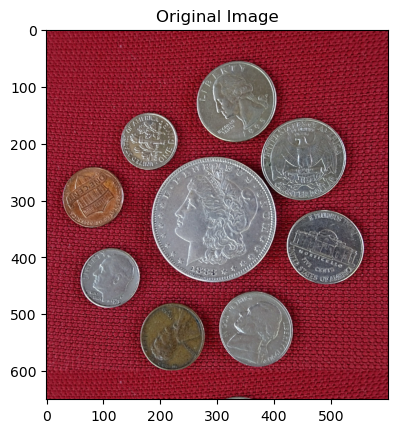

In [55]:
# Dont Change the Code 
imageCopy = image.copy()
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.show()
# Expected output

## <font style = "color:rgb(50,120,229)">Step 2: Convert Image to Grayscale</font>

In [56]:
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

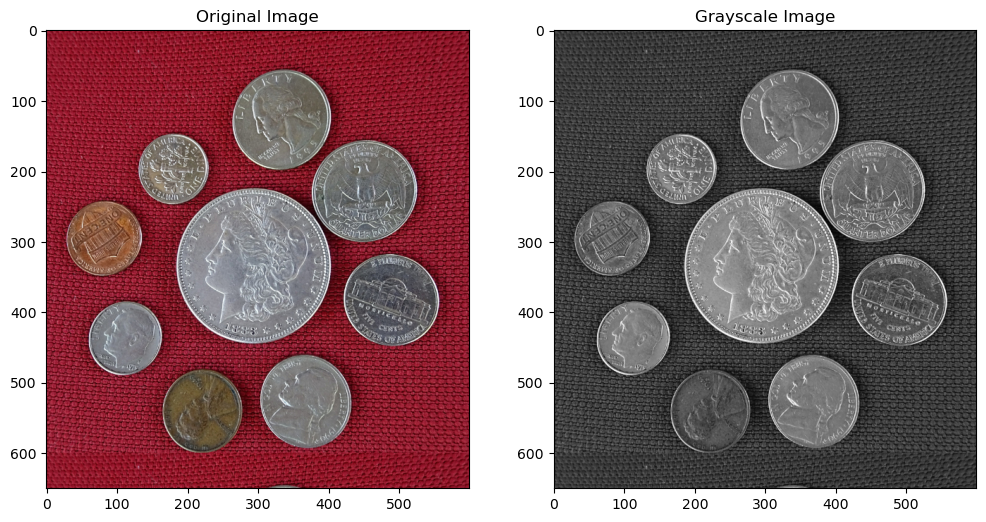

In [57]:
plt.figure(figsize=(12,12))
plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image")
plt.subplot(122); plt.imshow(imageGray,cmap='gray');plt.title("Grayscale Image"); plt.show()
# Expected output

## <font style = "color:rgb(50,120,229)">Step 3: Split Image into R,G,B Channels</font>

In [58]:
# The split() function in OpenCV returns the B, G, R channels in that order.
blueChannel, greenChannel, redChannel = cv2.split(image)

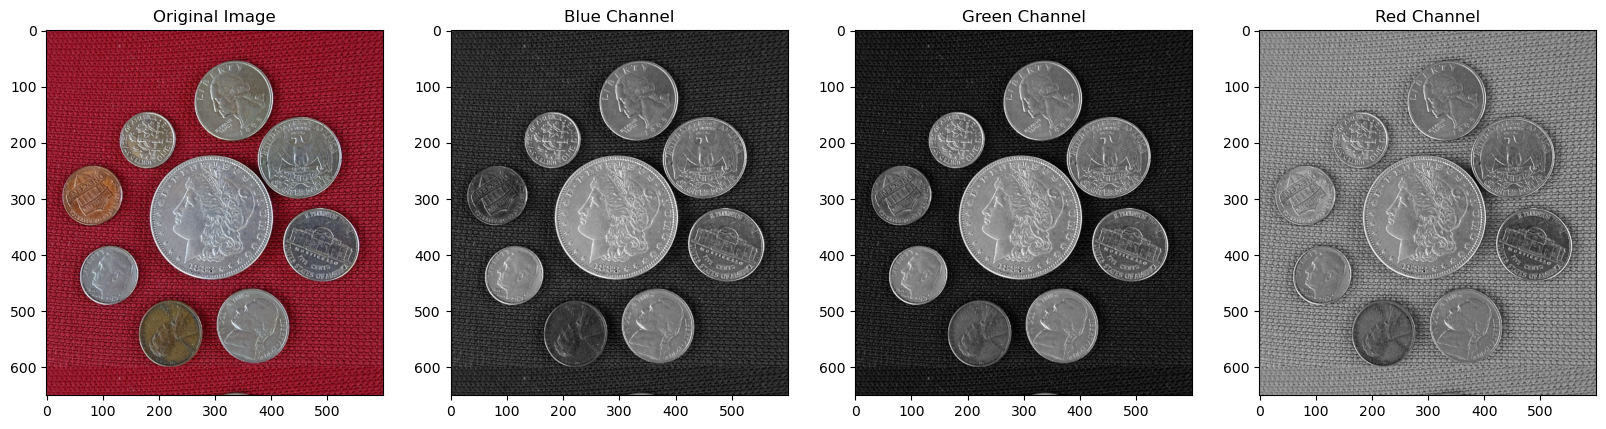

In [59]:
plt.figure(figsize=(20,12))

# Use blueChannel, greenChannel, redChannel
plt.subplot(141);plt.imshow(image[:,:,::-1]);plt.title("Original Image")
plt.subplot(142);plt.imshow(blueChannel,cmap='gray');plt.title("Blue Channel")
plt.subplot(143);plt.imshow(greenChannel,cmap='gray');plt.title("Green Channel")
plt.subplot(144);plt.imshow(redChannel,cmap='gray');plt.title("Red Channel")

plt.show()

## <font style = "color:rgb(50,120,229)">Step 4: Perform Thresholding</font>

You will have to carry out this step with different threshold values to see which one suits you the most. Do not remove those intermediate images and make sure to document your findings.

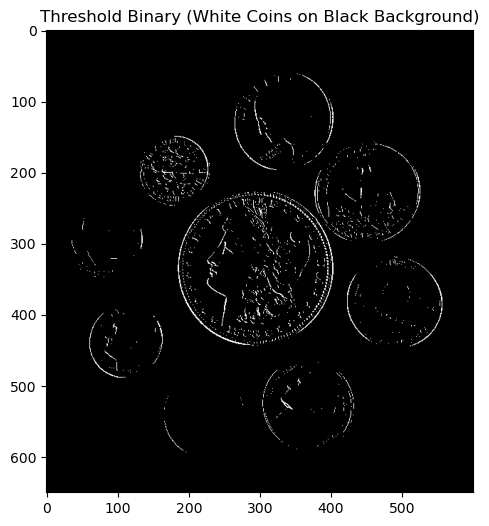

In [60]:
# Use the Grayscale image (imageGray from Step 2)
# We choose a high threshold value (e.g., 200) to ensure the white background is included
# The output will be: White coins (255) on a Black background (0)

ret, imageThresh = cv2.threshold(
    imageGray,           # Input image (Grayscale)
    200,                 # Threshold value (Tuning needed! Try 180-220)
    255,                 # Max value
    cv2.THRESH_BINARY    # Standard Binary Threshold (NOT Inverse)
)
# Display the thresholded image
plt.figure(figsize=(8, 6))
plt.imshow(imageThresh, cmap='gray')
plt.title("Threshold Binary (White Coins on Black Background)")
plt.show()

## <font style = "color:rgb(50,120,229)">Step 5: Perform morphological operations</font>

You will have to carry out this step with different kernel size, kernel shape and morphological operations to see which one (or more) suits you the most. Do not remove those intermediate images and make sure to document your findings.

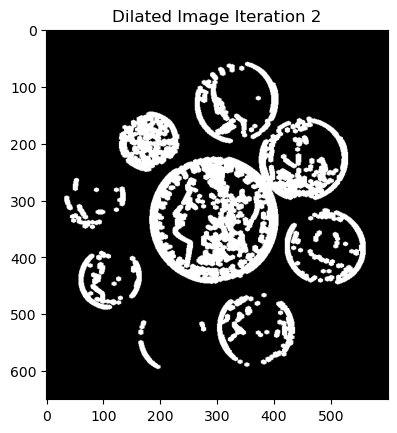

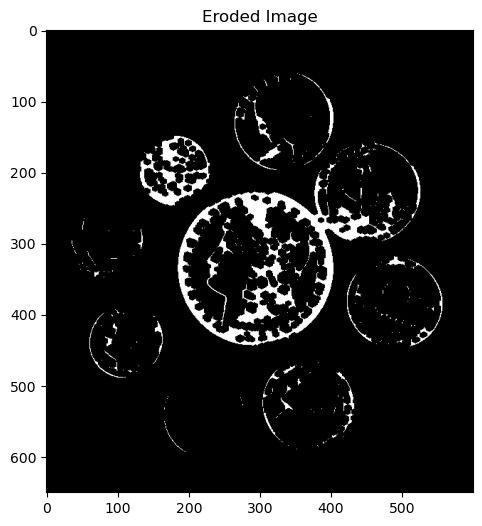

In [61]:
# Define a kernel for morphological operations (e.g., 5x5 ellipse)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# 1. Dilation: Fills small holes inside the coin blobs
imageDilated = cv2.dilate(imageThresh, kernel, iterations=2)
plt.imshow(imageDilated, cmap='gray')
plt.title("Dilated Image Iteration 2")
plt.show()

# 2. Erosion: Removes small white noise and smoothes coin edges
imageEroded = cv2.erode(imageDilated, kernel, iterations=2)

# Display the final morphological result
plt.figure(figsize=(8, 6))
plt.imshow(imageEroded, cmap='gray')
plt.title("Eroded Image")
plt.show()

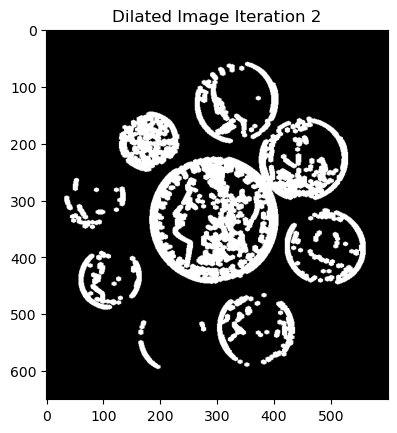

In [62]:
###
### YOUR CODE HERE
###
plt.imshow(imageDilated,cmap='gray');plt.title('Dilated Image Iteration 2');plt.show()
# Expected output

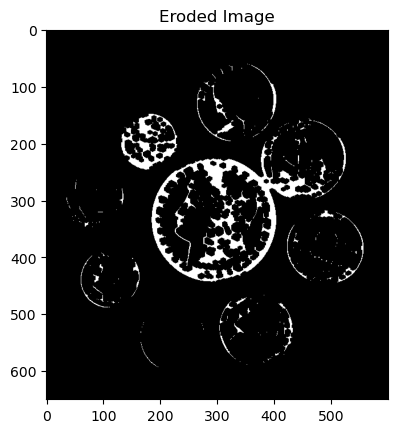

In [63]:
###
### YOUR CODE HERE
###
plt.imshow(imageEroded,cmap='gray');plt.title("Eroded Image");plt.show()
# Expected output

## <font style = "color:rgb(50,120,229)">Step 5: Create SimpleBlobDetector</font>

In [64]:
# --- IMPORTANT CHANGE FOR WHITE COINS ON BLACK BACKGROUND ---
# If your coins are now white (255) and the background is black (0):
params.filterByColor = True
params.blobColor = 255 # Look for white blobs
# ------------------------------------------------------------

# Keep these changes from the previous troubleshooting:
params.filterByArea = True
params.minArea = 500    # Low enough
params.maxArea = 60000  # High enough

params.filterByCircularity = True
params.minCircularity = 0.5 # Generous value
# ... other parameters ...

# Re-create and run the detector
detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(imageEroded) # Use imageEroded or imageThresh, whichever is cleanest
print(f"Number of coins detected: {len(keypoints)}")

Number of coins detected: 0


In [65]:
# Create SimpleBlobDetector
detector = cv2.SimpleBlobDetector_create(params)

## <font style = "color:rgb(50,120,229)">Step 6: Detect Coins</font>

### <font style = "color:rgb(8,133,37)">Hints</font>
Use **`detector.detect(image)`** to detect the blobs (coins). The output of the function is a list of **keypoints** where each keypoint is unique for each blob.

Print the number of coins detected as well.

Number of coins detected: 0


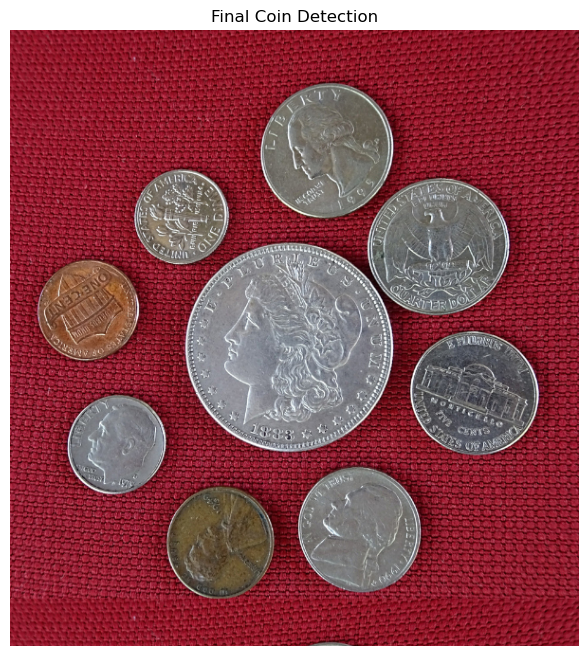

In [66]:
# Assuming the final cleaned image from the morphological operations is named 'imageEroded'

# 1. Use the detector to find the blobs (coins)
keypoints = detector.detect(imageEroded)

# 2. Calculate the number of coins detected
numberOfCoinsDetected = len(keypoints)

# 3. Print the number of coins detected
print(f"Number of coins detected: {numberOfCoinsDetected}")

# --- Optional: Visualize the result (Good practice, but not strictly required by the prompt) ---
# Draws red circles around the detected coins on the original color image
imageWithKeypoints = cv2.drawKeypoints(
    image, 
    keypoints, 
    np.array([]), 
    (0, 0, 255), 
    cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(imageWithKeypoints, cv2.COLOR_BGR2RGB))
plt.title('Final Coin Detection')
plt.axis('off')
plt.show()

In [53]:

print(f"Number of coins detected: {len(keypoints)}")
# Expected output

Number of coins detected: 0
